### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading Dataset

In [40]:
df = pd.read_csv('Loan.csv')
df.head()                  

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
df.shape                # Rows - 614, Columns - 13

(614, 13)

In [42]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [43]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
# dropping the missing values
df = df.dropna()

In [45]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [46]:
df.duplicated().sum()  # there is no dulicated value 

0

### EDA

<AxesSubplot:xlabel='Education', ylabel='count'>

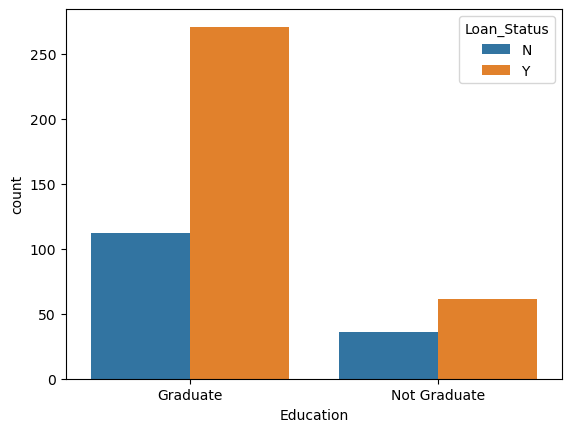

In [47]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=df)

### Inference
According to the data Graduate has more likely chances to get the loan

<AxesSubplot:xlabel='Married', ylabel='count'>

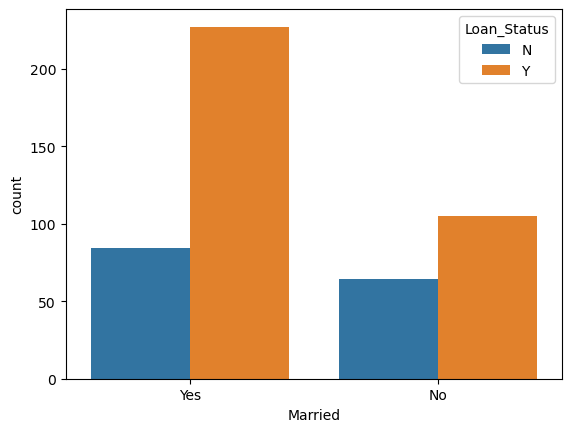

In [48]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=df)

### Inference
According to the data those who are married have likely more chances to get loan

In [49]:
df.drop('Loan_ID',axis = 1,inplace=True)

In [50]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


### Seprating Numerical Columns and Catagorical Columns

In [51]:
num_cols = df.dtypes[df.dtypes!=object].index
cat_cols = df.dtypes[df.dtypes==object].index
print(num_cols)
print(cat_cols)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


### Correlation

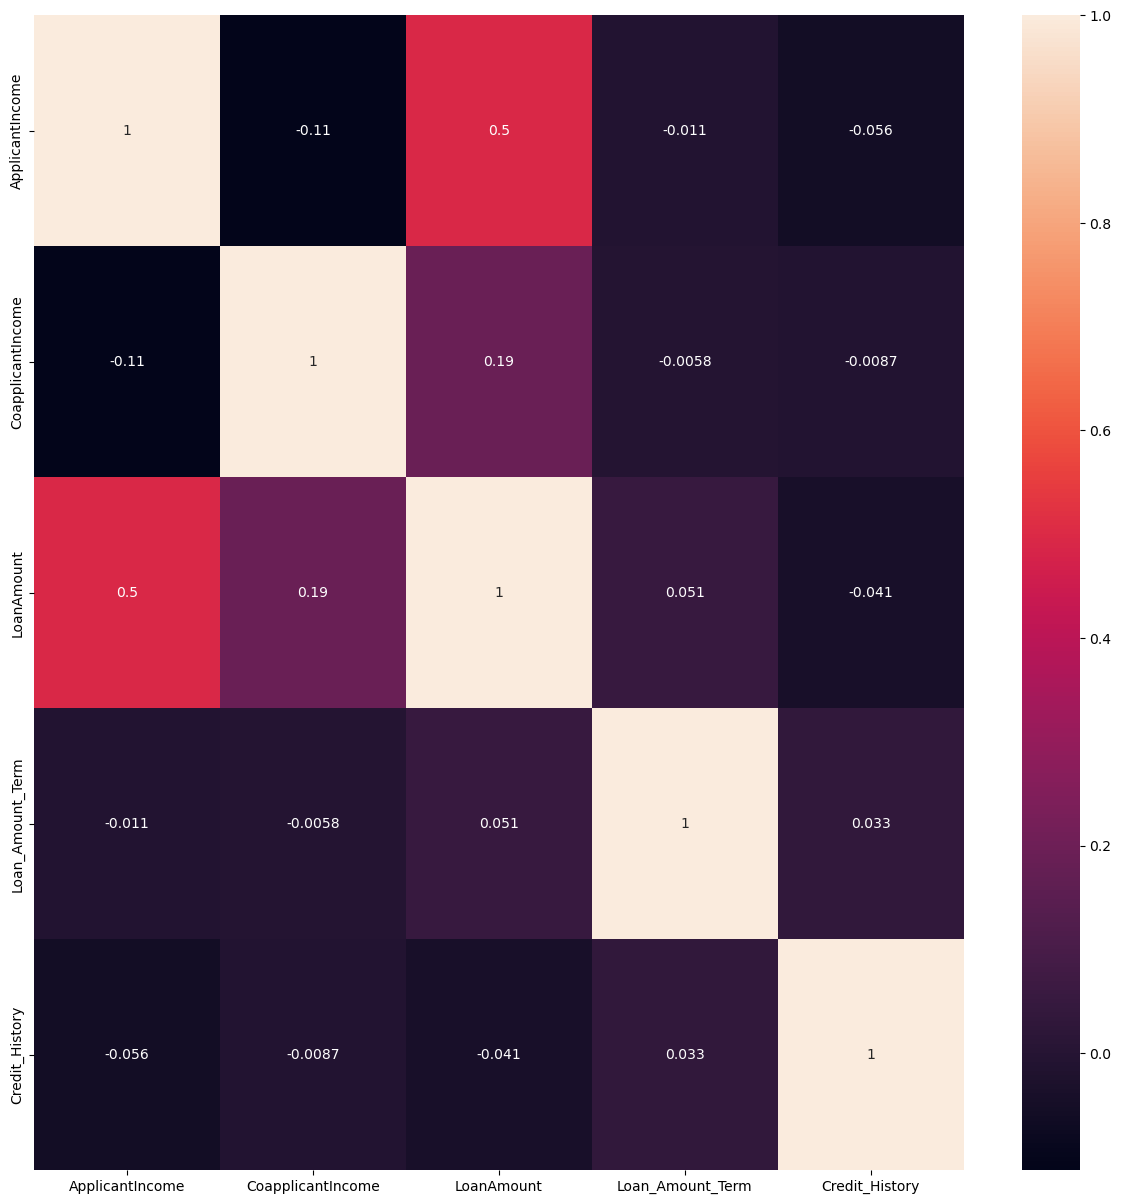

In [52]:
corr = df[num_cols].corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

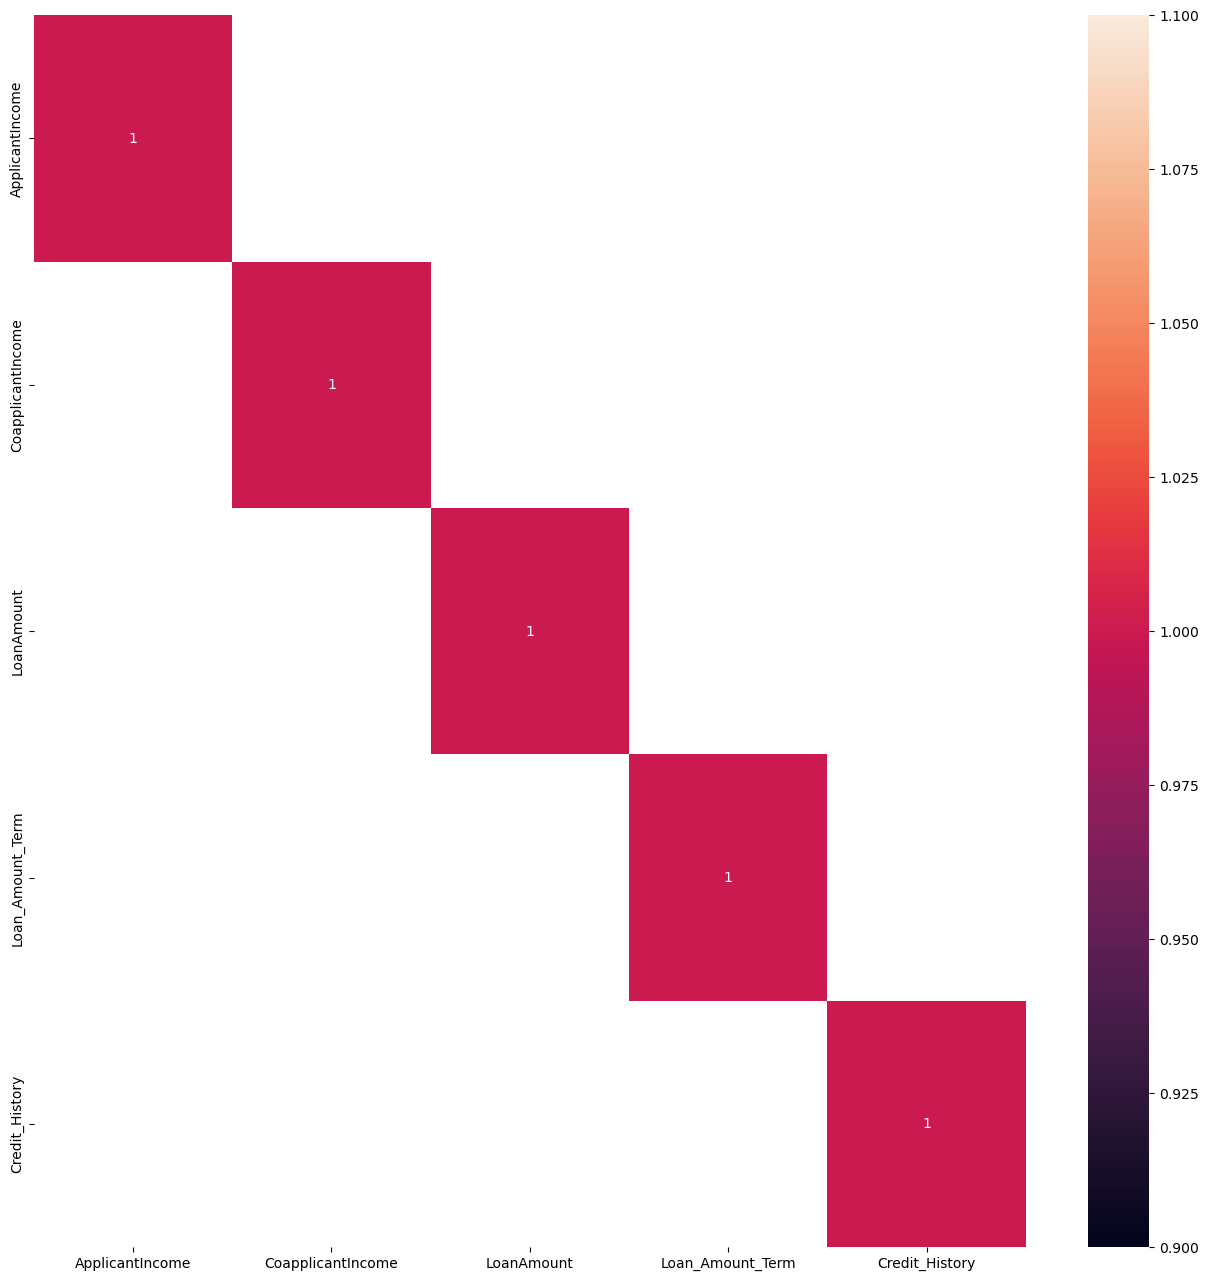

In [53]:
plt.figure(figsize=(16,16))
sns.heatmap(corr[abs(corr)>=0.7],annot=True)
plt.show()

### Inference
There are no highly correlated features

### Outlier Treatment

In [54]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
ApplicantIncome,480.0,5364.231250,5668.251251,150.0,1361.41,1614.5,1800.00,1927.90,3859.0,14583.0,14979.96,16423.25,17779.3,23091.73,81000.0
CoapplicantIncome,480.0,1581.093583,2617.692267,0.0,0.00,0.0,0.00,0.00,1084.5,4996.2,5624.84,6046.87,7226.8,9397.48,33837.0
LoanAmount,480.0,144.735417,80.508164,9.0,29.16,40.0,45.37,54.95,128.0,286.2,307.36,322.52,388.4,495.21,600.0
Loan_Amount_Term,480.0,342.050000,65.212401,36.0,84.00,154.8,180.00,180.00,360.0,360.0,360.00,360.00,480.0,480.00,480.0
Credit_History,480.0,0.854167,0.353307,0.0,0.00,0.0,0.00,0.00,1.0,1.0,1.00,1.00,1.0,1.00,1.0


In [55]:
def outlier_treatment_le(x):      # le = lower end
    x = x.clip(lower=x.quantile(0.01))
    return x

def outlier_treatment_ue(x):       # ue = upper end
    x = x.clip(upper=x.quantile(0.99))
    return x

In [56]:
lower_end = ['ApplicantIncome','LoanAmount','Loan_Amount_Term']
upper_end = ['ApplicantIncome','LoanAmount','Loan_Amount_Term']

In [57]:
df[lower_end] = df[lower_end].apply(outlier_treatment_le)
df[upper_end] = df[upper_end].apply(outlier_treatment_ue)

In [58]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
ApplicantIncome,480.0,5127.638958,3820.305002,1361.41,1374.5161,1614.5,1800.00,1927.90,3859.0,14583.0,14979.96,16423.25,17779.3,20833.3333,23091.73
CoapplicantIncome,480.0,1581.093583,2617.692267,0.00,0.0000,0.0,0.00,0.00,1084.5,4996.2,5624.84,6046.87,7226.8,9397.4800,33837.00
LoanAmount,480.0,144.222604,77.311298,29.16,29.8236,40.0,45.37,54.95,128.0,286.2,307.36,322.52,388.4,495.0441,495.21
Loan_Amount_Term,480.0,342.350000,63.917046,84.00,84.0000,154.8,180.00,180.00,360.0,360.0,360.00,360.00,480.0,480.0000,480.00
Credit_History,480.0,0.854167,0.353307,0.00,0.0000,0.0,0.00,0.00,1.0,1.0,1.00,1.00,1.0,1.0000,1.00


### Converting Catagorical Columns to Numrical Columns

In [59]:
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [60]:
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [61]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417.0,4196.0,267.0,360.0,1.0,2,1


In [62]:
# replacing the value of 3+ to 4
df = df.replace(to_replace='3+', value=4)

In [63]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

### Selecting X and Y

In [64]:
x = df.drop('Loan_Status',axis = 1)
y = df['Loan_Status']
print(x.shape)
print(y.shape)

(480, 11)
(480,)


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(384, 11)
(96, 11)
(384,)
(96,)


In [67]:
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    res_df = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc},index=[mname])
    print('Confusion_Matrix\n',cm)
    print('Classification Report\n',cr)
    return res_df

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

### Logistic Regression

In [70]:
lr1 = LogisticRegression(max_iter=100000)
lr_res = eval_model(lr1,x_train,y_train,x_test,y_test,'LogReg')

Confusion_Matrix
 [[15 19]
 [ 6 56]]
Classification Report
               precision    recall  f1-score   support

           0       0.71      0.44      0.55        34
           1       0.75      0.90      0.82        62

    accuracy                           0.74        96
   macro avg       0.73      0.67      0.68        96
weighted avg       0.74      0.74      0.72        96



In [71]:
lr_res

,Train_Acc,Test_Acc
LogReg,0.820312,0.739583


### Decision Tree Regressor

In [72]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_split=15)
dt_res = eval_model(dt,x_train,y_train,x_test,y_test,'DTree')
dt_res

Confusion_Matrix
 [[22 12]
 [14 48]]
Classification Report
               precision    recall  f1-score   support

           0       0.61      0.65      0.63        34
           1       0.80      0.77      0.79        62

    accuracy                           0.73        96
   macro avg       0.71      0.71      0.71        96
weighted avg       0.73      0.73      0.73        96



,Train_Acc,Test_Acc
DTree,0.888021,0.729167


### Random Forest Regressor

In [73]:
rf = RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=12,min_samples_split=15)
rf_res = eval_model(rf,x_train,y_train,x_test,y_test,'Random Forest')
rf_res

Confusion_Matrix
 [[17 17]
 [ 5 57]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.50      0.61        34
           1       0.77      0.92      0.84        62

    accuracy                           0.77        96
   macro avg       0.77      0.71      0.72        96
weighted avg       0.77      0.77      0.76        96



,Train_Acc,Test_Acc
Random Forest,0.859375,0.770833


### KNN

In [74]:
knn = KNeighborsClassifier(n_neighbors=15)
knn_res = eval_model(knn,x_train,y_train,x_test,y_test,'KNN')

Confusion_Matrix
 [[ 3 31]
 [ 0 62]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      0.09      0.16        34
           1       0.67      1.00      0.80        62

    accuracy                           0.68        96
   macro avg       0.83      0.54      0.48        96
weighted avg       0.78      0.68      0.57        96



In [75]:
knn_res

,Train_Acc,Test_Acc
KNN,0.713542,0.677083


### AdaBoost Classifer

In [76]:
ada = AdaBoostClassifier(n_estimators=70)  # depth of tree = 1
ada_res = eval_model(ada,x_train,y_train,x_test,y_test,'AdaBoost')
ada_res

Confusion_Matrix
 [[16 18]
 [ 6 56]]
Classification Report
               precision    recall  f1-score   support

           0       0.73      0.47      0.57        34
           1       0.76      0.90      0.82        62

    accuracy                           0.75        96
   macro avg       0.74      0.69      0.70        96
weighted avg       0.75      0.75      0.73        96



,Train_Acc,Test_Acc
AdaBoost,0.846354,0.75


In [81]:
all_res = pd.concat([lr_res,dt_res,rf_res,knn_res,ada_res])
all_res

,Train_Acc,Test_Acc
LogReg,0.820312,0.739583
DTree,0.888021,0.729167
Random Forest,0.859375,0.770833
KNN,0.713542,0.677083
AdaBoost,0.846354,0.750000


### Applying Hyperparameter Tuning at the best model

In [99]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [100]:
params_rf = {'n_estimators':[100,200,300,400,500],
            'max_depth':[9,10,11,12,13],
            'min_samples_split':[2,3,4,5,6]}

In [101]:
rf_base = RandomForestClassifier(random_state=8)
rs_rf1 = GridSearchCV(estimator=rf_base,param_grid= params_rf,scoring='accuracy',cv=5)
rs_rf1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=8),
             param_grid={'max_depth': [9, 10, 11, 12, 13],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [102]:
print(rs_rf1.best_estimator_)
print(rs_rf1.best_params_)
print(rs_rf1.best_score_)

RandomForestClassifier(max_depth=10, n_estimators=500, random_state=8)
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 500}
0.8178400546821599


In [103]:
rf2 = RandomForestClassifier(**rs_rf1.best_params_)
rf2.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=500)

In [105]:
ypred_rf2 =  rf.predict(x_test)

In [111]:
actual_ypred_rf1 = ypred_rf2   

res_df = pd.DataFrame({'Actual_y_test':y_test,'Pred':actual_ypred_rf1})
res_df.sample(20)

,Actual_y_test,Pred
265,1,1
471,0,0
154,1,1
553,0,0
297,1,1
163,1,1
267,1,0
84,1,1
538,0,1
352,1,1


### This is we can use Machine Learning for Loan Status Prediction
